# Regression - Introduction

## Exercise 1: housing regression

### 1.1

Using the *housing.csv* file, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [1]:
# exercise 1.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()

file_path = "~/Desktop/Bootcamp/Bootcamp Course/Module 4 - Regression/Day 20 - Regression P1 - Intro/6 - Data/housing.csv"
df = pd.read_csv(file_path)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [2]:
X = df.drop(['PRICE'],axis=1)
y = df['PRICE']
X
y
X.shape, y.shape

((506, 12), (506,))

In [3]:
# Adding Constant to DF
X = sm.add_constant(X)
X

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48


In [4]:
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          2.23e-133
Time:                        22:09:01   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.000      31.919      51.316
CRIM          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
ZN             0.0470      0.014      3.384      0.001       0.020       0.074
INDUS          0.0135      0.062      0.217      0.829      -0.109       0.136
CHAS           2.8400      0.870      3.264      0.001       1.131       4.549
NOX          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
RM             3.6581      0.420      8.705      0.000       2.832       4.484
AGE            0.0036      0.013      0.271      0.787      -0.023       0.030
DIS           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
RAD            0.2894      0.067      4.325      0.000       0.158       0.421
TAX           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
PTRATIO       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
LSTAT         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
# Dropping INDUS & AGE because of P-values
X = X.drop(['INDUS'], axis=1)

In [6]:
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.1
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          2.00e-134
Time:                        22:09:07   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.5437      4.920      8.445      0.000      31.878      51.210
CRIM          -0.1216      0.033     -3.691      0.000      -0.186      -0.057
ZN             0.0466      0.014      3.383      0.001       0.020       0.074
CHAS           2.8591      0.865      3.307      0.001       1.160       4.558
NOX          -18.5349      3.708     -4.999      0.000     -25.819     -11.250
RM             3.6500      0.418      8.728      0.000       2.828       4.472
AGE            0.0036      0.013      0.271      0.787      -0.023       0.030
DIS           -1.5000      0.197     -7.617      0.000      -1.887      -1.113
RAD            0.2854      0.064      4.443      0.000       0.159       0.412
TAX           -0.0123      0.003     -3.611      0.000      -0.019      -0.006
PTRATIO       -0.9338      0.131     -7.130      0.000      -1.191      -0.676
LSTAT         -0.5511      0.050    -10.927      0.000      -0.650      -0.452
==============================================================================
Omnibus:                      171.179   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.910
Skew:                           1.477   Prob(JB):                    4.24e-155
Kurtosis:                       7.999   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
X = X.drop(['AGE'], axis=1)

In [8]:
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.73e-135
Time:                        22:09:11   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4517      4.903      8.454      0.000      31.818      51.086
CRIM          -0.1217      0.033     -3.696      0.000      -0.186      -0.057
ZN             0.0462      0.014      3.378      0.001       0.019       0.073
CHAS           2.8719      0.863      3.329      0.001       1.177       4.567
NOX          -18.2624      3.565     -5.122      0.000     -25.267     -11.258
RM             3.6730      0.409      8.978      0.000       2.869       4.477
DIS           -1.5160      0.188     -8.078      0.000      -1.885      -1.147
RAD            0.2839      0.064      4.440      0.000       0.158       0.410
TAX           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
PTRATIO       -0.9310      0.130     -7.138      0.000      -1.187      -0.675
LSTAT         -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

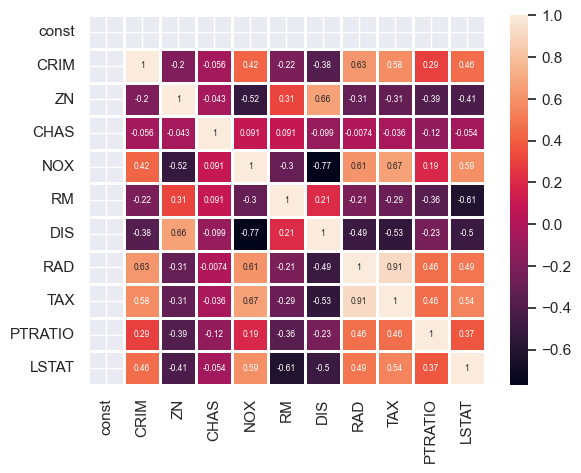

In [9]:
sns.heatmap(X.corr(), annot=True, linewidths=1, annot_kws={"size": 6})

In [10]:
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.73e-135
Time:                        22:09:22   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4517      4.903      8.454      0.000      31.818      51.086
CRIM          -0.1217      0.033     -3.696      0.000      -0.186      -0.057
ZN             0.0462      0.014      3.378      0.001       0.019       0.073
CHAS           2.8719      0.863      3.329      0.001       1.177       4.567
NOX          -18.2624      3.565     -5.122      0.000     -25.267     -11.258
RM             3.6730      0.409      8.978      0.000       2.869       4.477
DIS           -1.5160      0.188     -8.078      0.000      -1.885      -1.147
RAD            0.2839      0.064      4.440      0.000       0.158       0.410
TAX           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
PTRATIO       -0.9310      0.130     -7.138      0.000      -1.187      -0.675
LSTAT         -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
print(f'The R-Squared on this model is: {est.rsquared}.\n')
print(f'The coefficients of each feature are: \n{est.params}.')

The R-Squared on this model is: 0.7342422518382485.

The coefficients of each feature are: 
const      41.451747
CRIM       -0.121665
ZN          0.046191
CHAS        2.871873
NOX       -18.262427
RM          3.672957
DIS        -1.515951
RAD         0.283932
TAX        -0.012292
PTRATIO    -0.930961
LSTAT      -0.546509
dtype: float64.


### Exercise 1.2: Polynomial features

Use polynomial features to improve your regression model in `exercise 1.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [13]:
X = df.drop(['PRICE', 'AGE', 'INDUS'],axis=1)
y = df['PRICE']

X

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.0,0.573,6.593,2.4786,1.0,273.0,21.0,9.67
502,0.04527,0.0,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,9.08
503,0.06076,0.0,0.0,0.573,6.976,2.1675,1.0,273.0,21.0,5.64
504,0.10959,0.0,0.0,0.573,6.794,2.3889,1.0,273.0,21.0,6.48


In [14]:
X = sm.add_constant(X)

est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.73e-135
Time:                        22:09:44   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4517      4.903      8.454      0.000      31.818      51.086
CRIM          -0.1217      0.033     -3.696      0.000      -0.186      -0.057
ZN             0.0462      0.014      3.378      0.001       0.019       0.073
CHAS           2.8719      0.863      3.329      0.001       1.177       4.567
NOX          -18.2624      3.565     -5.122      0.000     -25.267     -11.258
RM             3.6730      0.409      8.978      0.000       2.869       4.477
DIS           -1.5160      0.188     -8.078      0.000      -1.885      -1.147
RAD            0.2839      0.064      4.440      0.000       0.158       0.410
TAX           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
PTRATIO       -0.9310      0.130     -7.138      0.000      -1.187      -0.675
LSTAT         -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X = X.drop(['RAD'],axis=1)

In [16]:
X = X.drop(['TAX'],axis=1)

In [17]:
X['RM_SQ'] = (df['RM'])**2
X['TAX_RAD'] = (0.01*df['TAX']+0.5*df['RAD'])**3

X

,const,CRIM,ZN,CHAS,NOX,RM,DIS,PTRATIO,LSTAT,RM_SQ,TAX_RAD
0,1.0,0.00632,18.0,0.0,0.538,6.575,4.0900,15.3,4.98,43.230625,41.421736
1,1.0,0.02731,0.0,0.0,0.469,6.421,4.9671,17.8,9.14,41.229241,40.001688
2,1.0,0.02729,0.0,0.0,0.469,7.185,4.9671,17.8,4.03,51.624225,40.001688
3,1.0,0.03237,0.0,0.0,0.458,6.998,6.0622,18.7,2.94,48.972004,51.478848
4,1.0,0.06905,0.0,0.0,0.458,7.147,6.0622,18.7,5.33,51.079609,51.478848
...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,0.0,0.573,6.593,2.4786,21.0,9.67,43.467649,33.698267
502,1.0,0.04527,0.0,0.0,0.573,6.120,2.2875,21.0,9.08,37.454400,33.698267
503,1.0,0.06076,0.0,0.0,0.573,6.976,2.1675,21.0,5.64,48.664576,33.698267
504,1.0,0.10959,0.0,0.0,0.573,6.794,2.3889,21.0,6.48,46.158436,33.698267


In [18]:
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     190.6
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.17e-162
Time:                        22:09:49   Log-Likelihood:                -1440.7
No. Observations:                 506   AIC:                             2903.
Df Residuals:                     495   BIC:                             2950.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.6955      9.124     15.529      0.000     123.768     159.623
CRIM          -0.1368      0.029     -4.698      0.000      -0.194      -0.080
ZN             0.0241      0.012      2.016      0.044       0.001       0.048
CHAS           2.7886      0.757      3.682      0.000       1.301       4.277
NOX          -19.6446      3.052     -6.436      0.000     -25.642     -13.647
RM           -29.9918      2.681    -11.185      0.000     -35.260     -24.723
DIS           -1.1201      0.166     -6.729      0.000      -1.447      -0.793
PTRATIO       -0.7730      0.117     -6.624      0.000      -1.002      -0.544
LSTAT         -0.5683      0.042    -13.604      0.000      -0.650      -0.486
RM_SQ          2.6388      0.207     12.750      0.000       2.232       3.045
TAX_RAD        0.0002      0.000      2.072      0.039    1.22e-05       0.000
==============================================================================
Omnibus:                      184.565   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3304.769
Skew:                           1.102   Prob(JB):                         0.00
Kurtosis:                      15.324   Cond. No.                     1.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

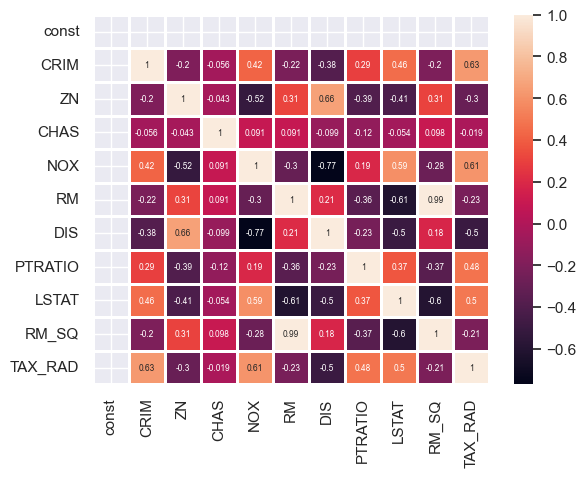

In [19]:
sns.heatmap(X.corr(), annot=True, linewidths=1, annot_kws={"size": 6})

In [20]:
print(f'The R-Squared on this model is: {est.rsquared}.\n')
print(f'The coefficients of each feature are: \n{est.params}.')

The R-Squared on this model is: 0.7938602050536355.

The coefficients of each feature are: 
const      141.695508
CRIM        -0.136822
ZN           0.024092
CHAS         2.788632
NOX        -19.644647
RM         -29.991753
DIS         -1.120134
PTRATIO     -0.773021
LSTAT       -0.568349
RM_SQ        2.638840
TAX_RAD      0.000236
dtype: float64.


### Exercise 1.3: Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.
- The y axis on each chart is the target value (house price)
- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each
- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well
- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

In [21]:
# exercise 1.3
X

,const,CRIM,ZN,CHAS,NOX,RM,DIS,PTRATIO,LSTAT,RM_SQ,TAX_RAD
0,1.0,0.00632,18.0,0.0,0.538,6.575,4.0900,15.3,4.98,43.230625,41.421736
1,1.0,0.02731,0.0,0.0,0.469,6.421,4.9671,17.8,9.14,41.229241,40.001688
2,1.0,0.02729,0.0,0.0,0.469,7.185,4.9671,17.8,4.03,51.624225,40.001688
3,1.0,0.03237,0.0,0.0,0.458,6.998,6.0622,18.7,2.94,48.972004,51.478848
4,1.0,0.06905,0.0,0.0,0.458,7.147,6.0622,18.7,5.33,51.079609,51.478848
...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,0.0,0.573,6.593,2.4786,21.0,9.67,43.467649,33.698267
502,1.0,0.04527,0.0,0.0,0.573,6.120,2.2875,21.0,9.08,37.454400,33.698267
503,1.0,0.06076,0.0,0.0,0.573,6.976,2.1675,21.0,5.64,48.664576,33.698267
504,1.0,0.10959,0.0,0.0,0.573,6.794,2.3889,21.0,6.48,46.158436,33.698267


In [22]:
cols = X.columns

for i in range(1,len(cols)):
    est = sm.OLS(y, sm.add_constant(X[cols[i]])).fit() 
    #print(f'The R-Squared on {cols[i]} is: {est.rsquared}.')

X_feat = (sm.add_constant(X['LSTAT']))
est = sm.OLS(y, X_feat).fit() 
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           5.08e-88
Time:                        22:09:54   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [25]:
# Getting the intercept and slope
inter, slope = est.params
inter, slope

(34.5538408793831, -0.9500493537579899)

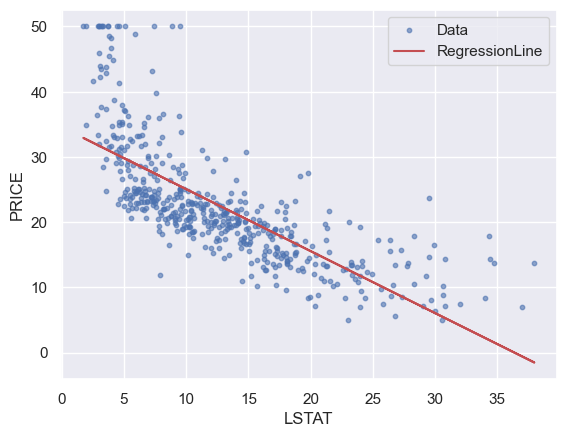

In [26]:
plt.scatter(X['LSTAT'],y, alpha=0.6, label='Data', s=10)

plt.plot(X['LSTAT'], inter+slope*X['LSTAT'], color='r', label='RegressionLine')

plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.legend()

## Exercise 2: Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **1.3**, but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fig, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

In [27]:
cols = X.columns

for i in range(1,len(cols)):
    est = sm.OLS(y, sm.add_constant(X[cols[i]])).fit() 
    #print(est.summary())
    print(cols[i], '', est.rsquared)

    
    
# LSTAT=0.544, RM_SQ=0.516, RM=.484, PTRATIO=0.258

CRIM  0.15078046904975717
ZN  0.12992084489428957
CHAS  0.03071612970877502
NOX  0.182603042501699
RM  0.48352545599133423
DIS  0.062464372121782796
PTRATIO  0.257847318009223
LSTAT  0.5441462975864797
RM_SQ  0.5157670692068055
TAX_RAD  0.16079178096551971


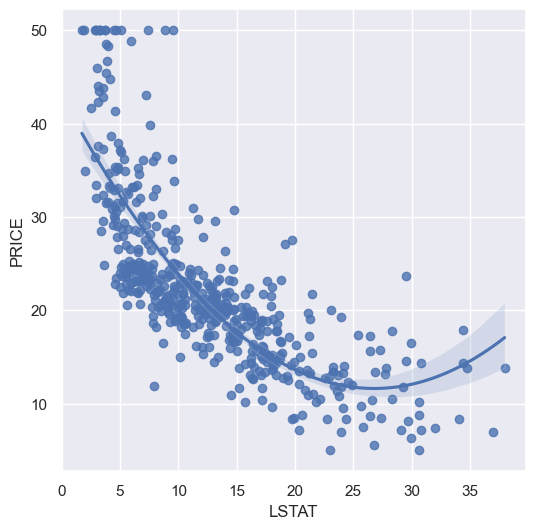

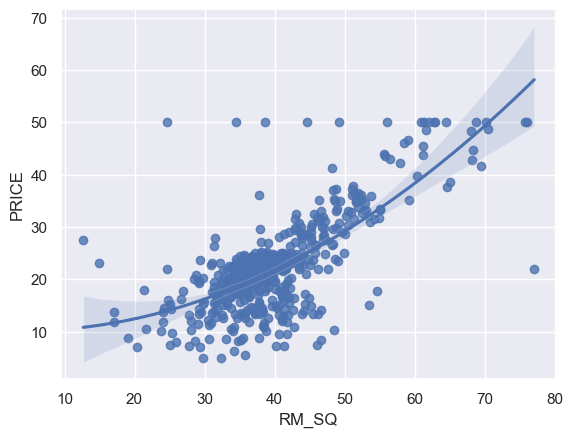

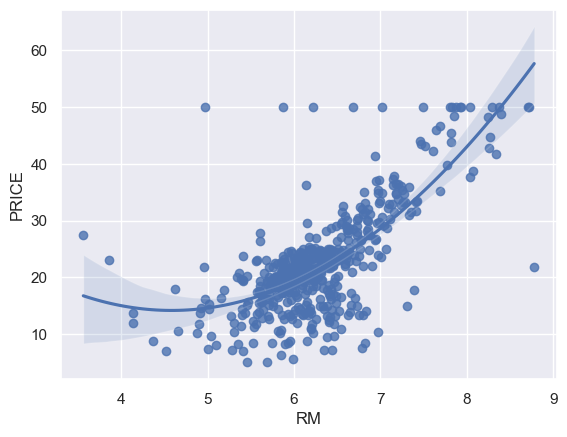

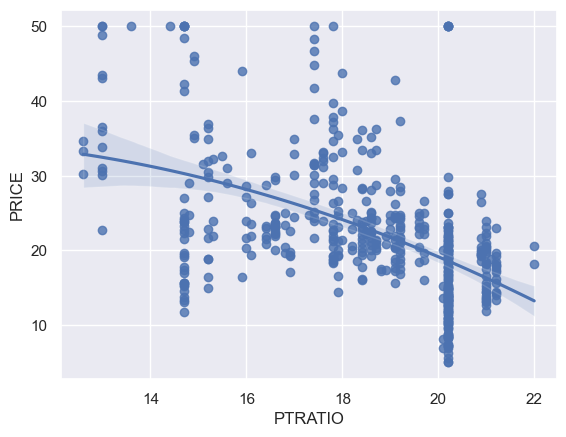

In [28]:
# multiple subplots
from scipy.stats import norm
from random import uniform

features = ['LSTAT', 'RM_SQ', 'RM', 'PTRATIO'] 

fig, ax = plt.subplots(figsize=(6,6))

def make_plot(xRow, ax0):
    sns.regplot(x=xRow, y=df['PRICE'], order=2)
    plt.show()
    
make_plot(X[features[0]], ax)
make_plot(X[features[1]], ax)
make_plot(X[features[2]], ax)
make_plot(X[features[3]], ax)
